In [1]:
## Doing the vanilla vs the pooling for fashion mnist

import json
import math

from wavNN.train_model import TrainingLoop
from wavNN.models.wavMLP import WavMLP
from wavNN.models.wavpool import WavPool
from wavNN.models.vanillaMLP import VanillaMLP
from wavNN.data_generators.fashion_mnist_generator import FashionMNISTGenerator

import torch

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Common Parameters 

data_params = {"sample_size": [4000, 2000, 2000], "split": True}

optimizer = torch.optim.SGD
optimizer_config = {
    "lr": 0.01, 
}

loss = torch.nn.CrossEntropyLoss
epochs = 80
n_tests = 10

In [4]:
def run_model_experiment(model, model_params): 
    model_history = {}

    for iteration in range(n_tests): 

        training = TrainingLoop(
            model_class=model,
            model_params=model_params,
            data_class=FashionMNISTGenerator,
            data_params=data_params,
            optimizer_class=optimizer,
            optimizer_config=optimizer_config,
            loss=loss,
            epochs=80,
        )

        training()
        model_history[iteration] = training.history
    return model_history

def plot_model_history(history, title): 

    train_loss = torch.tensor([history[i]['train_loss'] for i in history]).detach().numpy()
    train_loss_std = np.std(train_loss, axis=0)
    train_loss_mean = np.mean(train_loss, axis=0)

    val_loss = torch.tensor([history[i]['val_loss'] for i in history]).detach().numpy()
    val_std = np.std(val_loss, axis=0)
    val_mean = np.mean(val_loss, axis=0)

    plt.errorbar(range(len(train_loss_mean)), train_loss_mean, yerr=train_loss_std, label="Train", alpha=.5)
    plt.errorbar(range(len(train_loss_mean)), val_mean, yerr=val_std, label="Validation", alpha=.5)

    plt.title(title)
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

    train_ac = torch.tensor([history[i]['train_accuracy'] for i in history]).detach().numpy()
    train_ac_std = np.std(train_ac, axis=0)
    train_ac_mean = np.mean(train_ac, axis=0)

    val_ac = torch.tensor([history[i]['val_accuracy'] for i in history]).detach().numpy()
    val_std = np.std(val_ac, axis=0)
    val_mean = np.mean(val_ac, axis=0)

    plt.errorbar(range(len(train_ac_mean)), train_ac_mean, yerr=train_ac_std, label="Train", alpha=.5)
    plt.errorbar(range(len(train_ac_mean)), val_mean, yerr=val_std, label="Validation", alpha=.5)

    plt.legend()
    plt.title(title)
    plt.xlabel("Epoch")
    plt.show()

In [6]:
# Vanilla test
vanilla_mlp_parameters = {
        "in_channels": 28,
        "hidden_size": 256,
        "out_channels": 10,
}
vanilla_history = run_model_experiment(VanillaMLP, vanilla_mlp_parameters)

100.0%


Extracting ./data/fashionmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/fashionmnist/FashionMNIST/raw



100.0%


Extracting ./data/fashionmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/fashionmnist/FashionMNIST/raw



100.0%


Extracting ./data/fashionmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/fashionmnist/FashionMNIST/raw



100.0%


Extracting ./data/fashionmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/fashionmnist/FashionMNIST/raw



In [7]:
wavmlp_parameters = {
        "in_channels": 28,
        "hidden_size": 256,
        "out_channels": 10,
        "level":2
}
wavmlp_history = run_model_experiment(WavMLP, wavmlp_parameters)

In [9]:
wavpool_parameters = {
    "in_channels": 28,
        "hidden_size": 256,
        "out_channels": 10,
        "hidden_pooling": 20, 
        "level_pooling": 2, 
        "pooling_mode":"average"
}
wavpool_history = run_model_experiment(WavPool, wavpool_parameters)

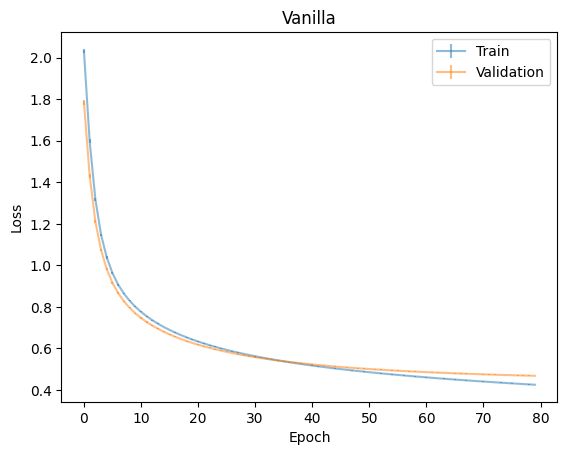

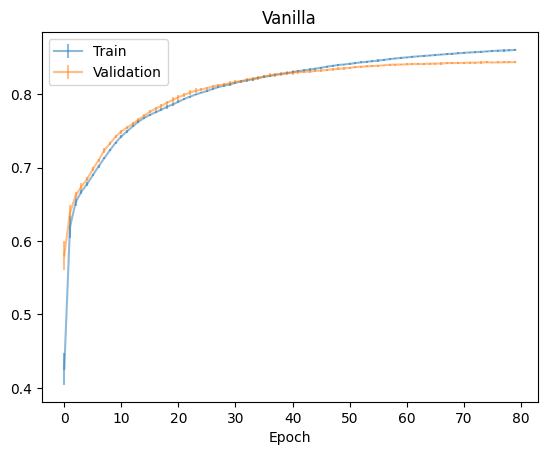

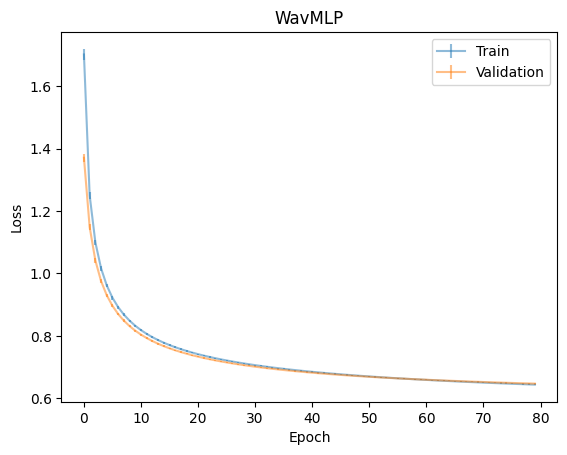

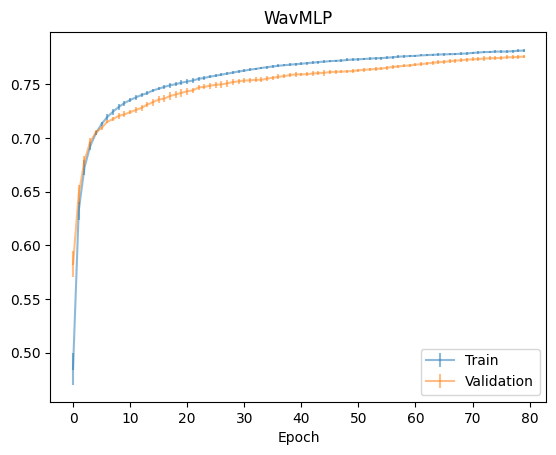

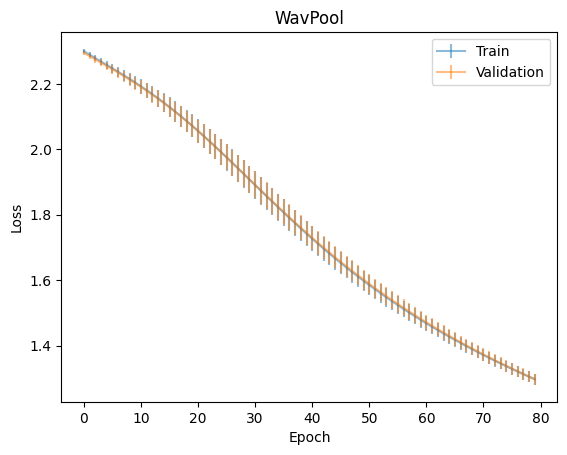

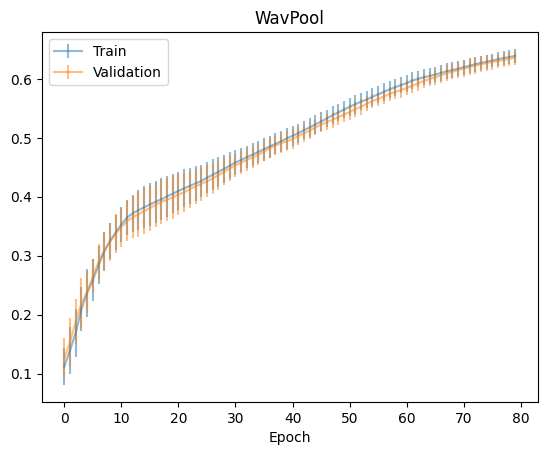

In [10]:
plot_model_history(vanilla_history, "Vanilla")
plot_model_history(wavmlp_history, "WavMLP")
plot_model_history(wavpool_history, "WavPool")